In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import cv2
from google.colab.patches import cv2_imshow

In [ ]:
def load_data(path, size):

  data = np.array([])
  for i in range(size):
    print(i)
    img_path = path + str(i) + '.png'
    img = cv2.imread(img_path)
    data = np.append(data, img)

  data = np.reshape(data, (-1, 100, 100, 3))
  print(data.shape)

  for i in range(3):
    cv2_imshow(data[i, :, :, :])
  
  return data

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

location = 'drive/MyDrive/Colab/'
size = 1000  # number of pictures to load

data = load_data(location+'Semestr_4/planowanie_ruchu/Second_map_dataset/maps2/map_', size)
planned_data = load_data(location+'Semestr_4/planowanie_ruchu/Second_map_dataset/planned_paths/planned_map_', size)
# planned_data = data + planned_data

cv2_imshow(data[1, :, : ,:] + planned_data[1, :, : ,:])

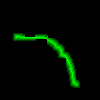

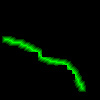

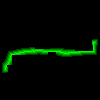

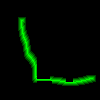

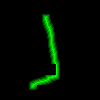

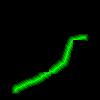

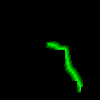

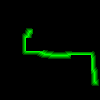

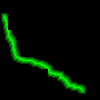

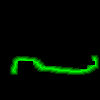

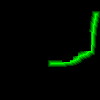

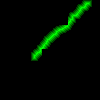

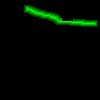

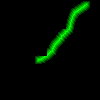

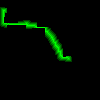

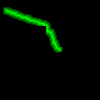

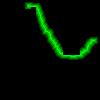

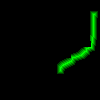

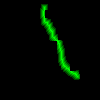

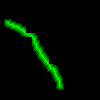

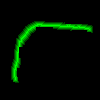

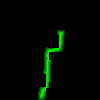

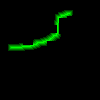

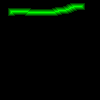

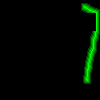

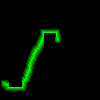

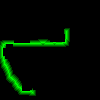

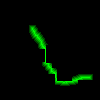

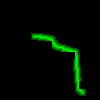

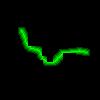

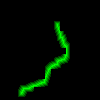

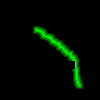

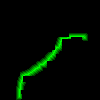

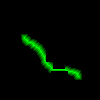

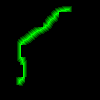

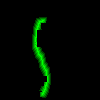

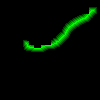

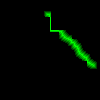

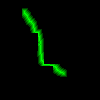

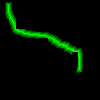

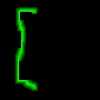

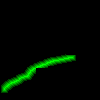

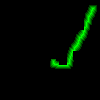

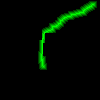

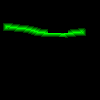

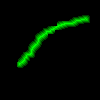

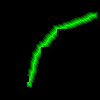

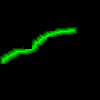

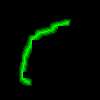

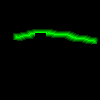

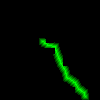

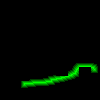

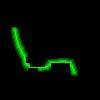

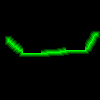

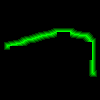

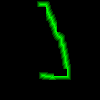

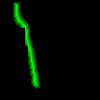

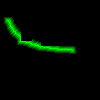

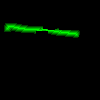

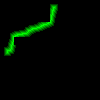

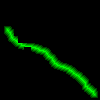

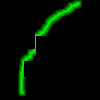

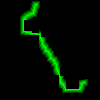

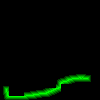

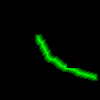

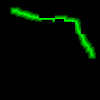

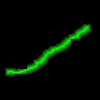

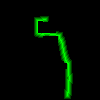

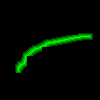

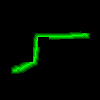

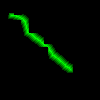

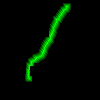

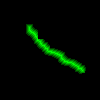

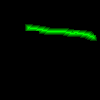

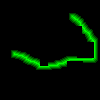

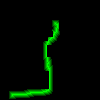

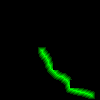

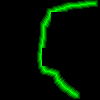

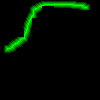

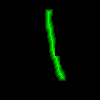

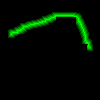

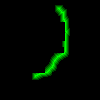

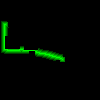

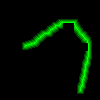

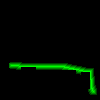

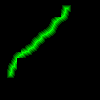

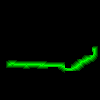

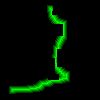

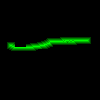

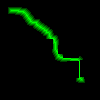

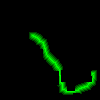

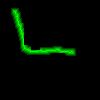

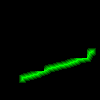

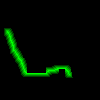

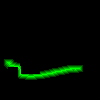

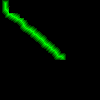

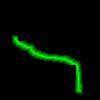

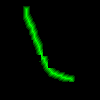

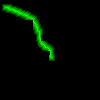

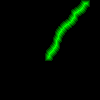

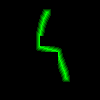

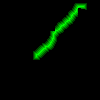

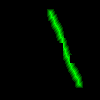

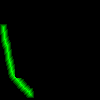

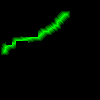

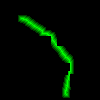

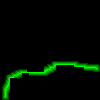

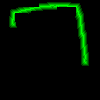

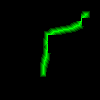

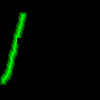

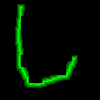

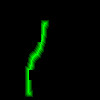

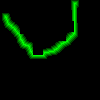

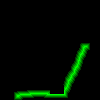

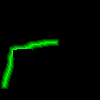

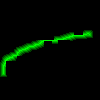

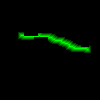

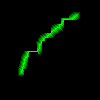

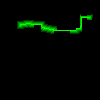

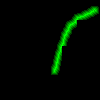

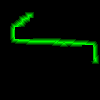

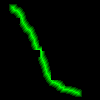

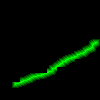

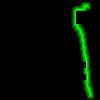

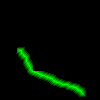

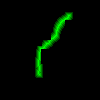

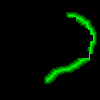

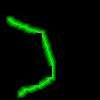

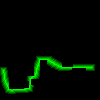

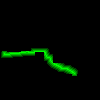

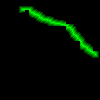

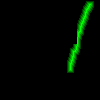

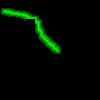

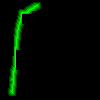

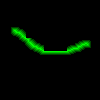

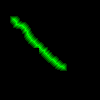

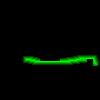

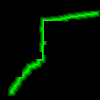

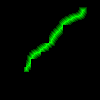

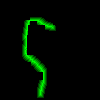

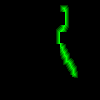

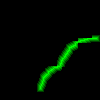

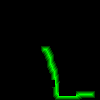

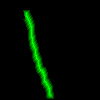

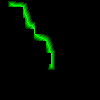

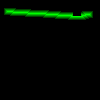

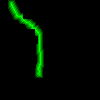

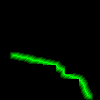

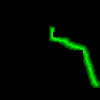

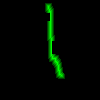

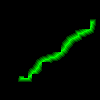

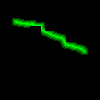

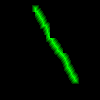

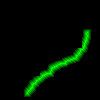

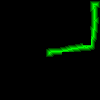

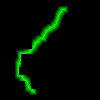

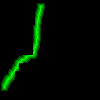

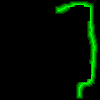

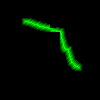

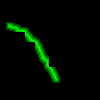

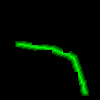

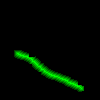

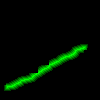

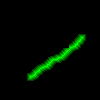

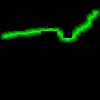

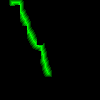

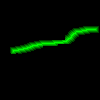

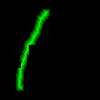

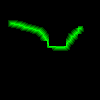

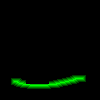

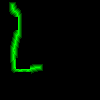

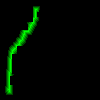

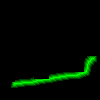

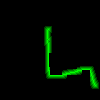

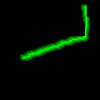

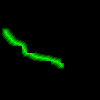

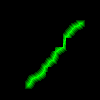

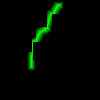

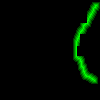

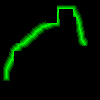

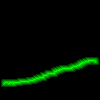

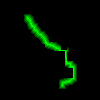

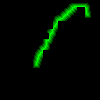

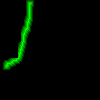

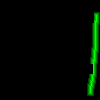

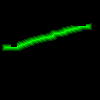

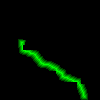

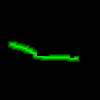

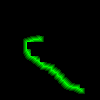

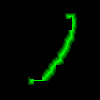

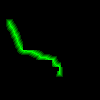

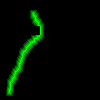

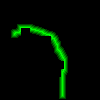

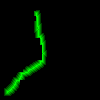

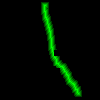

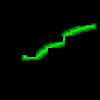

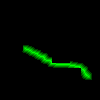

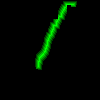

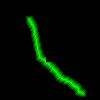

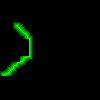

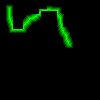

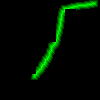

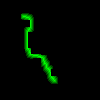

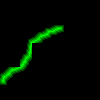

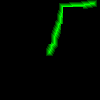

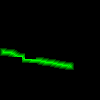

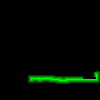

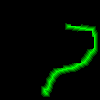

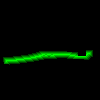

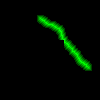

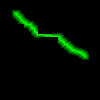

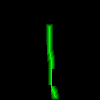

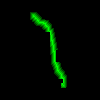

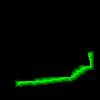

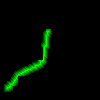

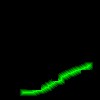

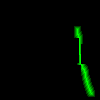

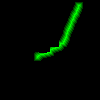

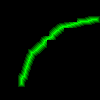

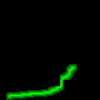

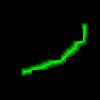

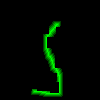

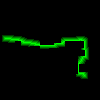

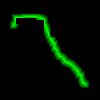

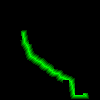

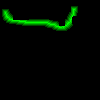

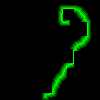

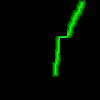

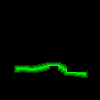

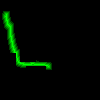

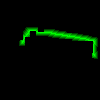

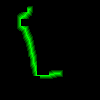

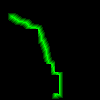

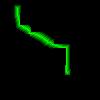

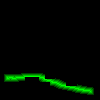

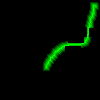

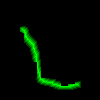

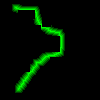

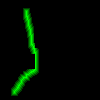

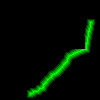

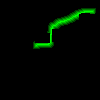

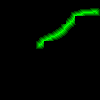

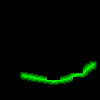

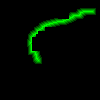

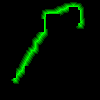

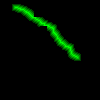

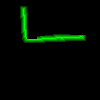

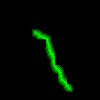

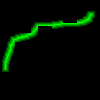

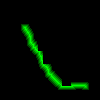

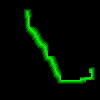

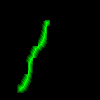

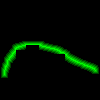

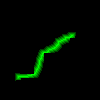

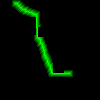

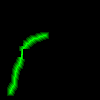

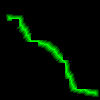

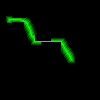

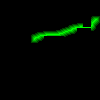

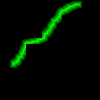

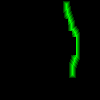

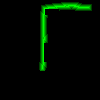

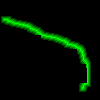

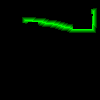

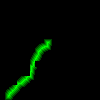

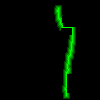

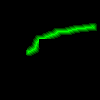

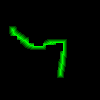

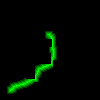

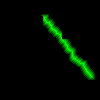

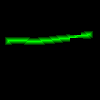

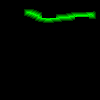

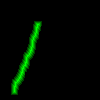

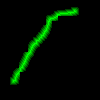

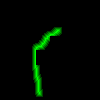

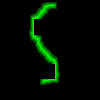

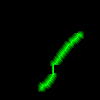

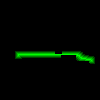

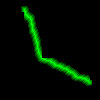

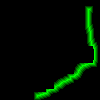

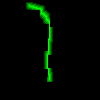

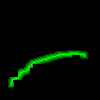

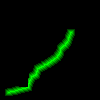

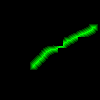

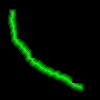

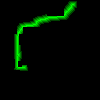

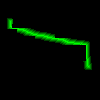

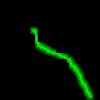

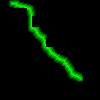

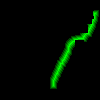

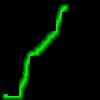

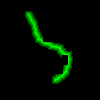

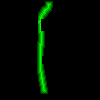

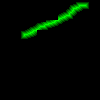

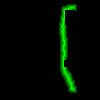

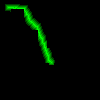

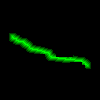

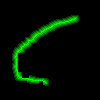

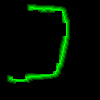

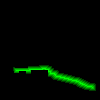

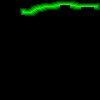

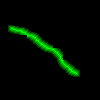

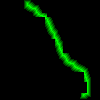

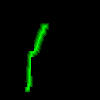

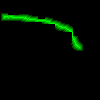

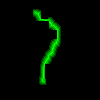

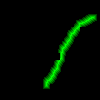

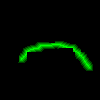

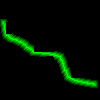

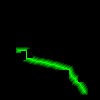

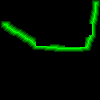

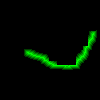

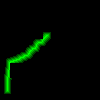

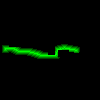

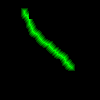

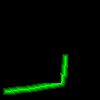

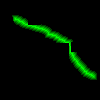

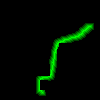

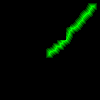

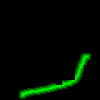

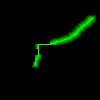

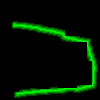

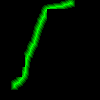

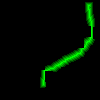

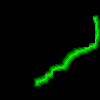

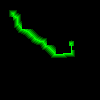

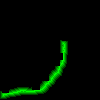

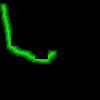

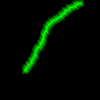

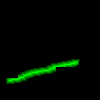

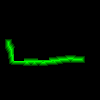

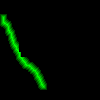

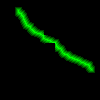

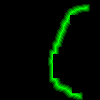

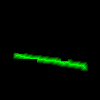

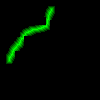

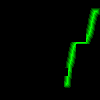

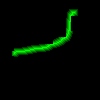

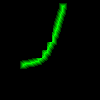

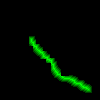

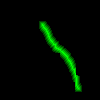

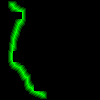

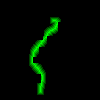

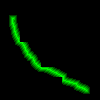

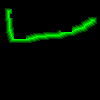

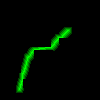

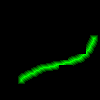

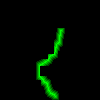

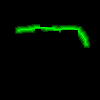

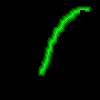

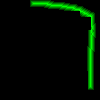

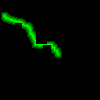

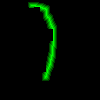

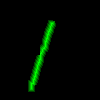

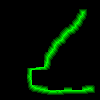

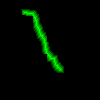

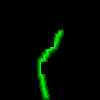

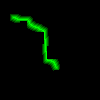

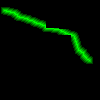

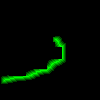

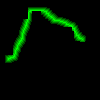

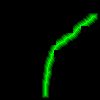

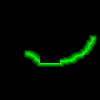

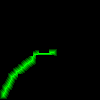

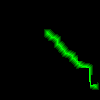

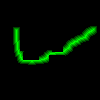

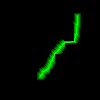

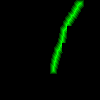

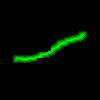

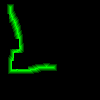

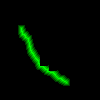

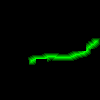

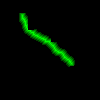

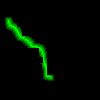

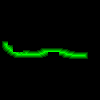

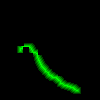

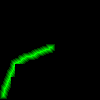

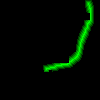

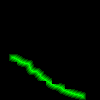

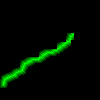

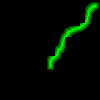

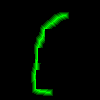

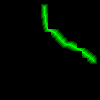

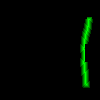

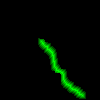

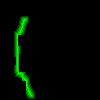

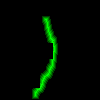

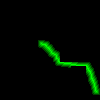

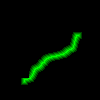

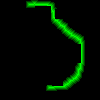

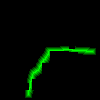

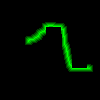

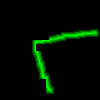

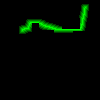

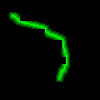

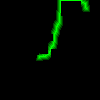

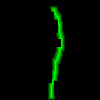

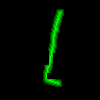

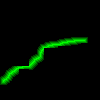

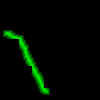

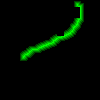

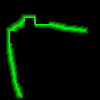

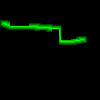

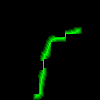

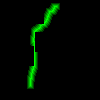

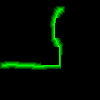

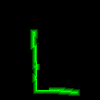

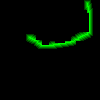

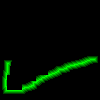

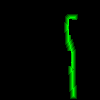

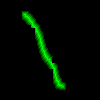

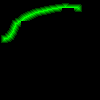

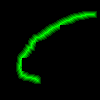

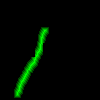

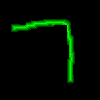

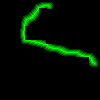

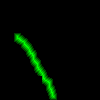

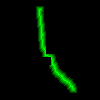

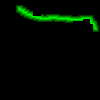

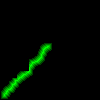

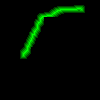

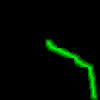

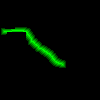

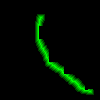

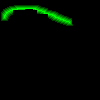

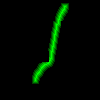

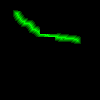

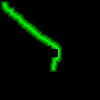

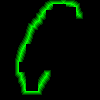

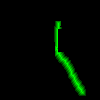

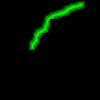

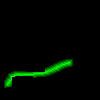

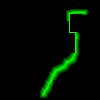

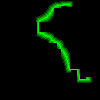

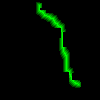

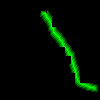

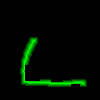

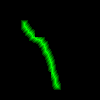

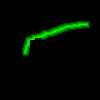

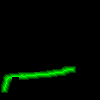

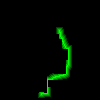

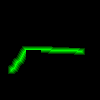

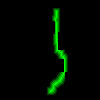

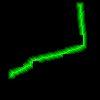

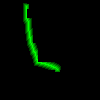

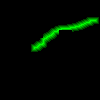

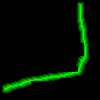

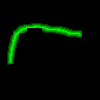

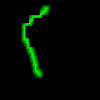

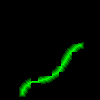

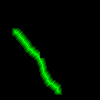

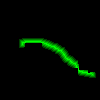

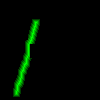

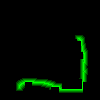

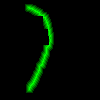

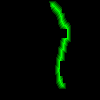

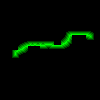

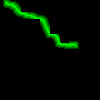

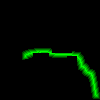

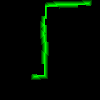

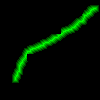

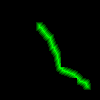

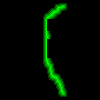

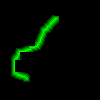

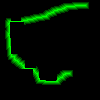

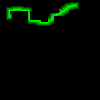

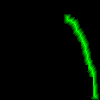

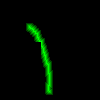

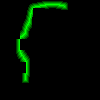

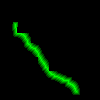

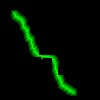

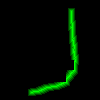

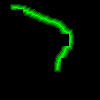

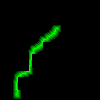

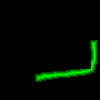

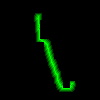

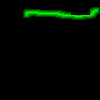

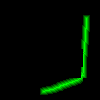

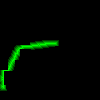

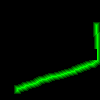

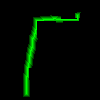

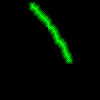

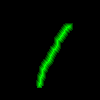

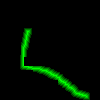

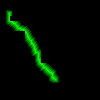

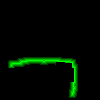

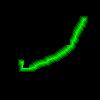

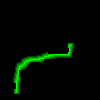

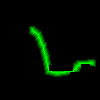

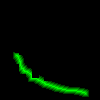

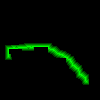

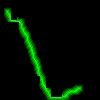

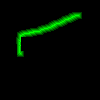

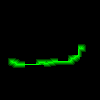

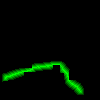

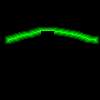

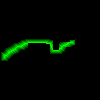

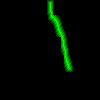

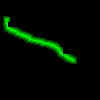

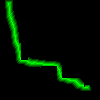

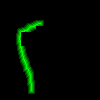

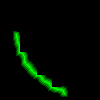

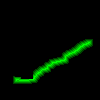

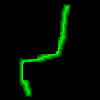

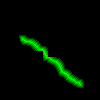

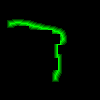

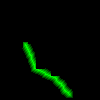

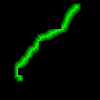

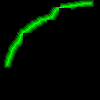

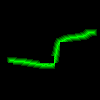

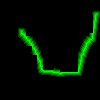

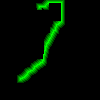

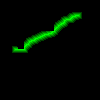

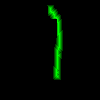

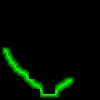

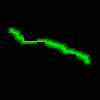

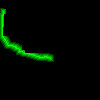

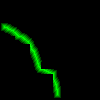

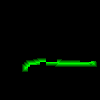

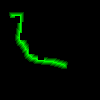

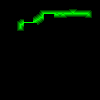

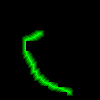

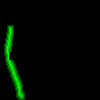

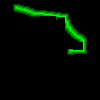

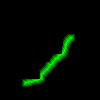

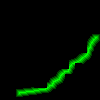

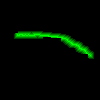

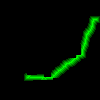

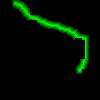

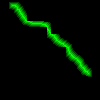

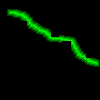

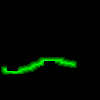

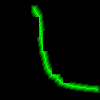

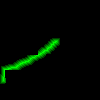

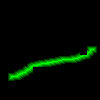

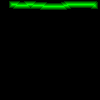

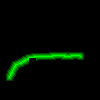

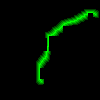

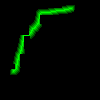

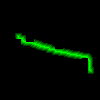

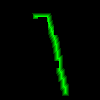

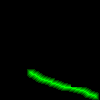

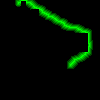

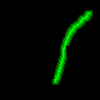

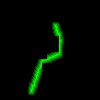

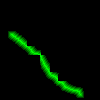

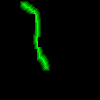

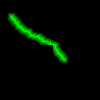

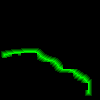

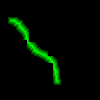

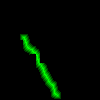

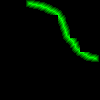

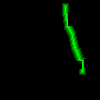

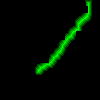

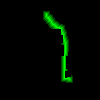

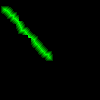

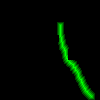

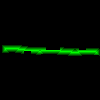

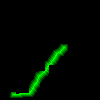

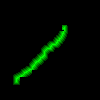

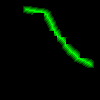

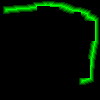

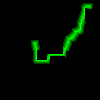

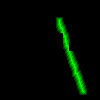

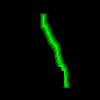

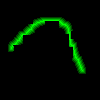

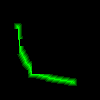

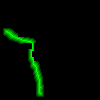

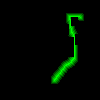

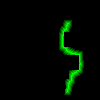

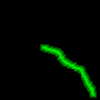

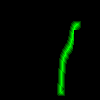

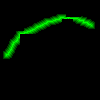

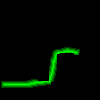

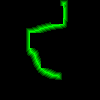

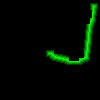

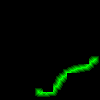

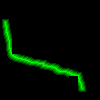

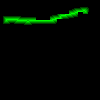

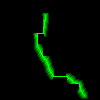

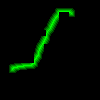

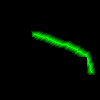

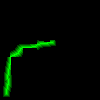

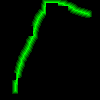

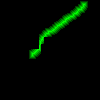

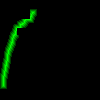

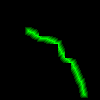

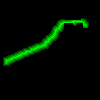

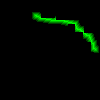

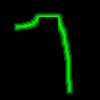

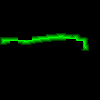

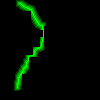

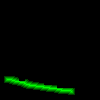

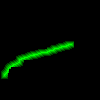

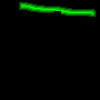

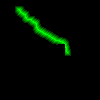

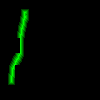

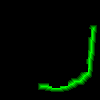

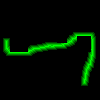

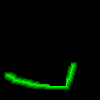

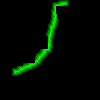

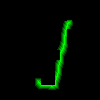

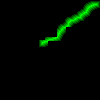

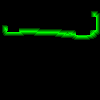

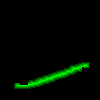

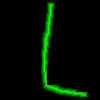

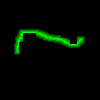

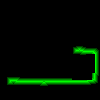

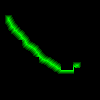

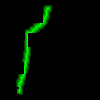

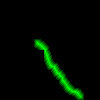

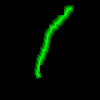

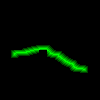

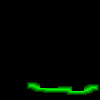

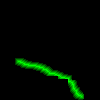

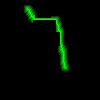

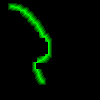

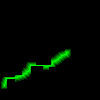

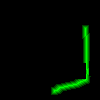

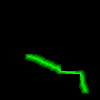

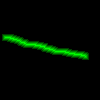

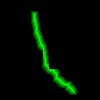

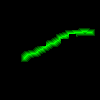

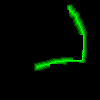

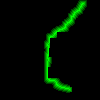

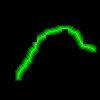

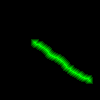

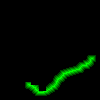

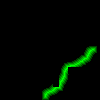

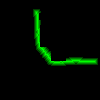

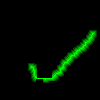

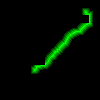

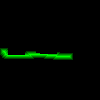

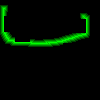

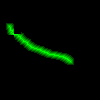

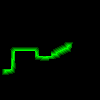

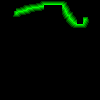

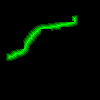

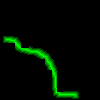

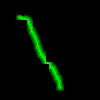

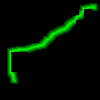

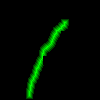

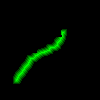

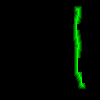

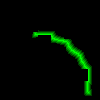

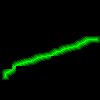

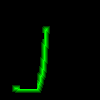

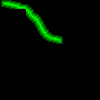

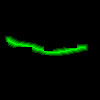

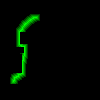

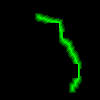

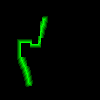

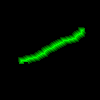

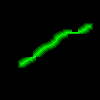

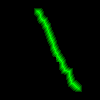

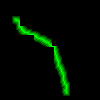

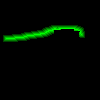

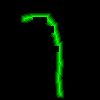

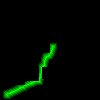

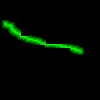

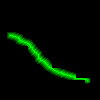

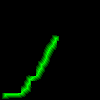

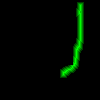

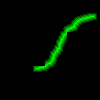

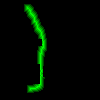

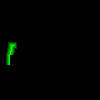

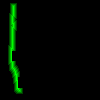

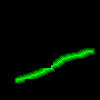

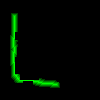

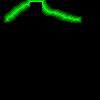

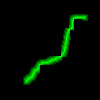

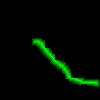

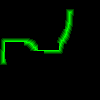

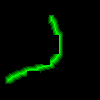

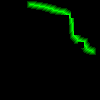

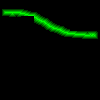

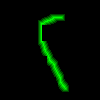

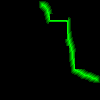

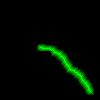

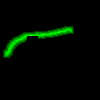

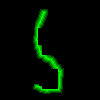

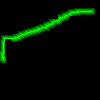

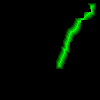

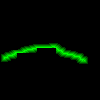

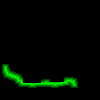

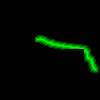

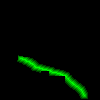

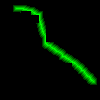

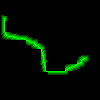

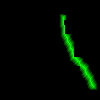

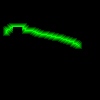

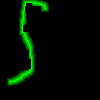

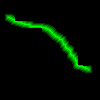

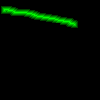

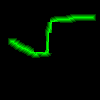

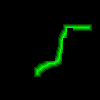

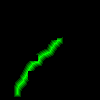

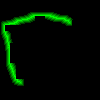

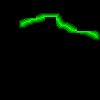

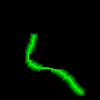

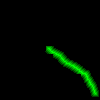

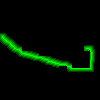

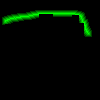

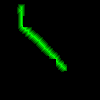

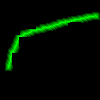

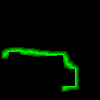

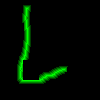

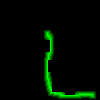

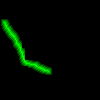

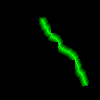

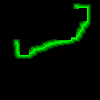

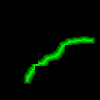

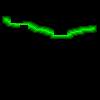

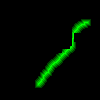

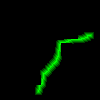

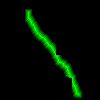

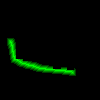

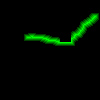

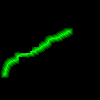

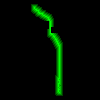

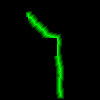

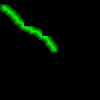

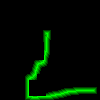

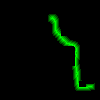

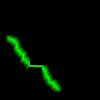

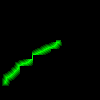

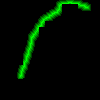

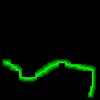

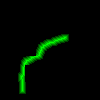

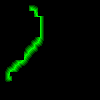

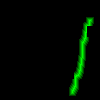

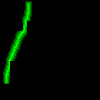

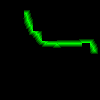

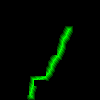

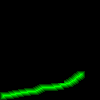

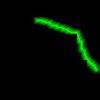

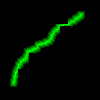

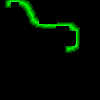

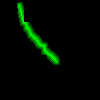

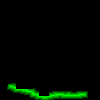

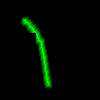

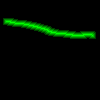

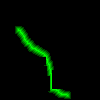

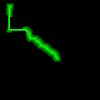

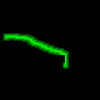

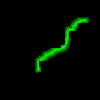

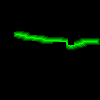

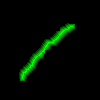

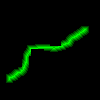

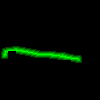

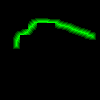

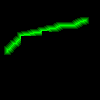

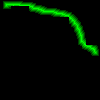

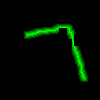

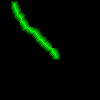

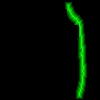

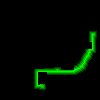

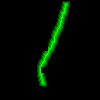

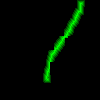

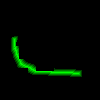

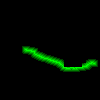

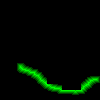

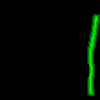

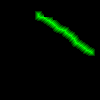

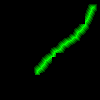

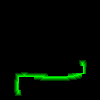

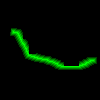

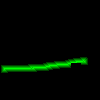

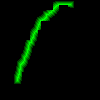

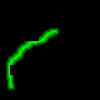

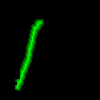

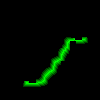

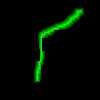

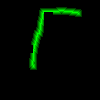

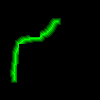

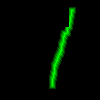

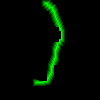

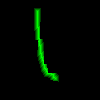

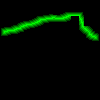

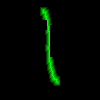

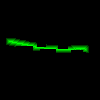

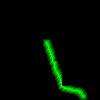

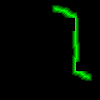

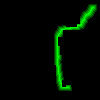

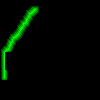

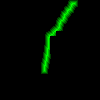

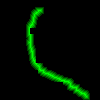

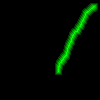

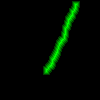

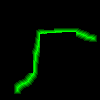

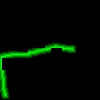

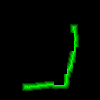

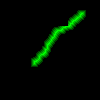

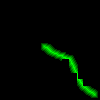

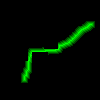

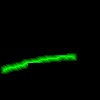

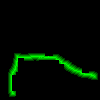

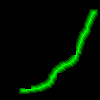

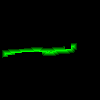

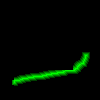

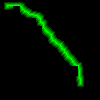

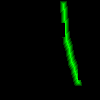

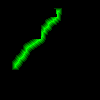

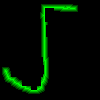

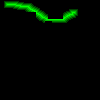

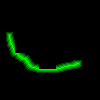

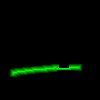

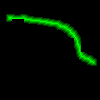

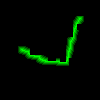

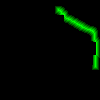

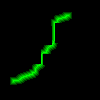

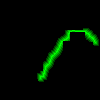

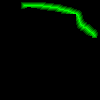

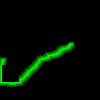

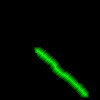

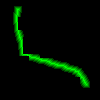

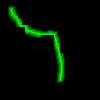

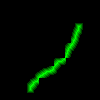

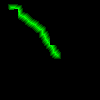

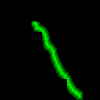

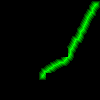

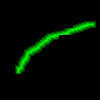

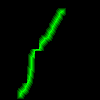

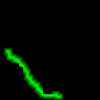

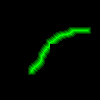

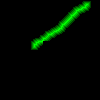

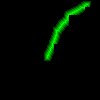

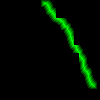

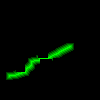

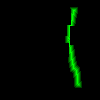

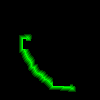

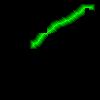

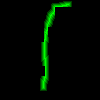

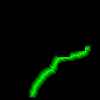

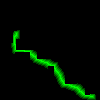

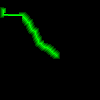

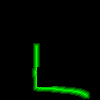

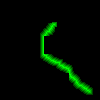

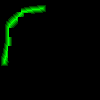

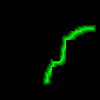

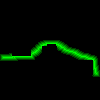

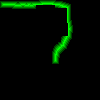

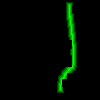

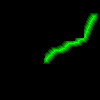

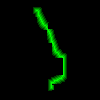

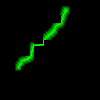

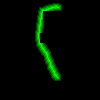

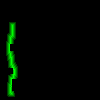

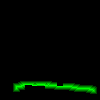

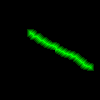

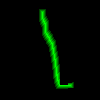

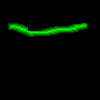

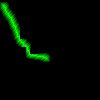

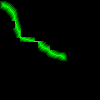

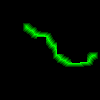

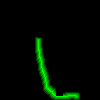

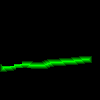

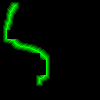

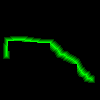

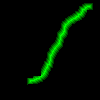

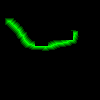

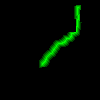

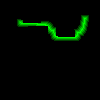

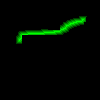

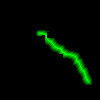

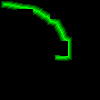

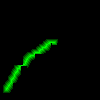

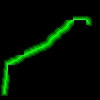

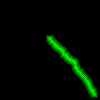

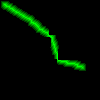

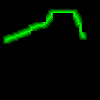

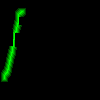

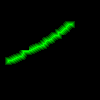

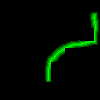

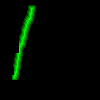

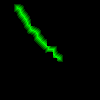

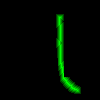

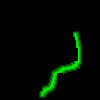

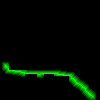

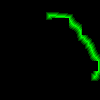

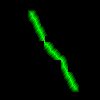

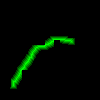

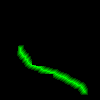

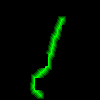

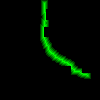

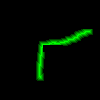

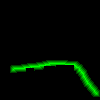

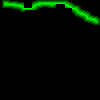

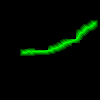

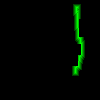

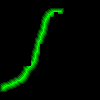

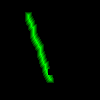

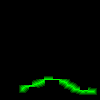

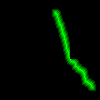

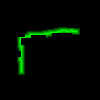

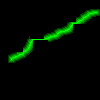

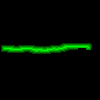

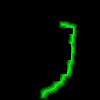

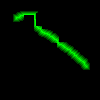

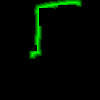

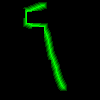

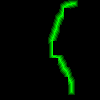

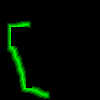

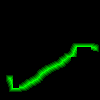

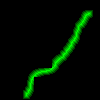

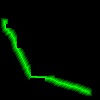

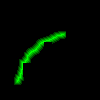

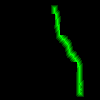

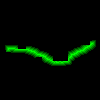

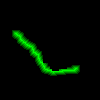

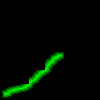

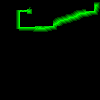

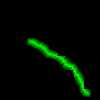

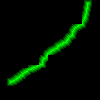

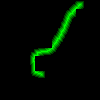

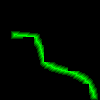

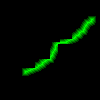

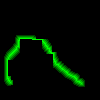

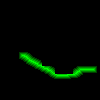

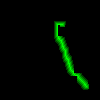

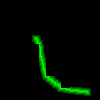

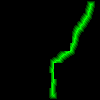

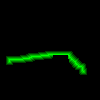

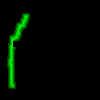

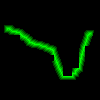

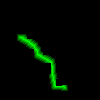

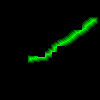

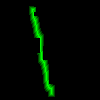

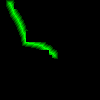

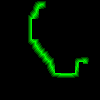

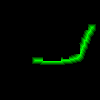

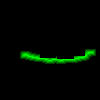

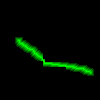

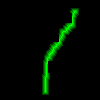

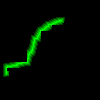

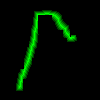

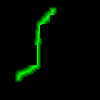

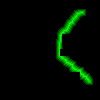

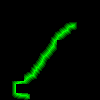

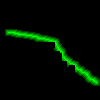

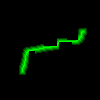

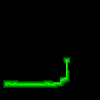

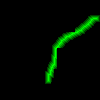

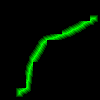

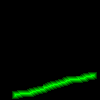

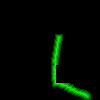

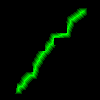

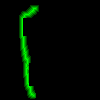

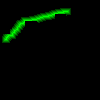

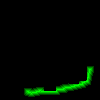

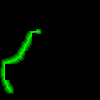

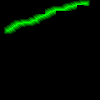

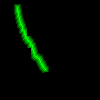

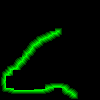

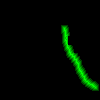

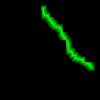

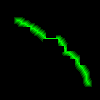

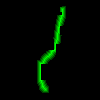

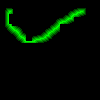

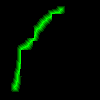

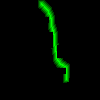

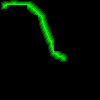

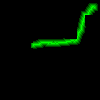

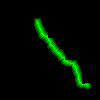

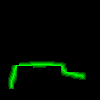

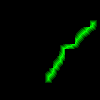

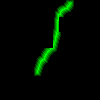

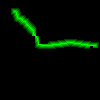

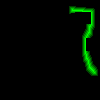

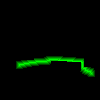

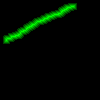

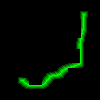

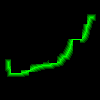

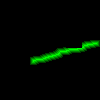

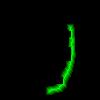

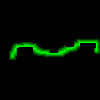

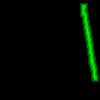

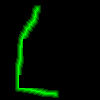

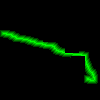

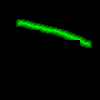

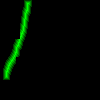

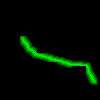

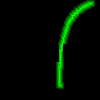

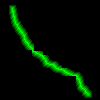

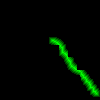

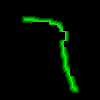

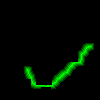

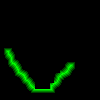

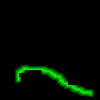

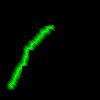

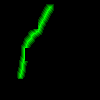

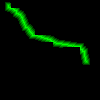

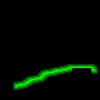

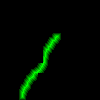

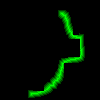

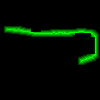

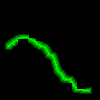

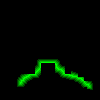

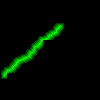

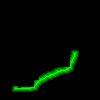

In [ ]:
for i in range(len(planned_data)):

  obstacle = data[i ,:, :, 0]
  path_1 = planned_data[i ,:, :, 1]
  kernel = np.ones((3,3),np.uint8)

  path_2 = cv2.dilate(path_1,kernel,iterations = 1)
  path_3 = cv2.dilate(path_1,kernel,iterations = 2)
  path_4 = cv2.dilate(path_1,kernel,iterations = 3)

  new_path = (path_1 - obstacle) + (path_2 - path_1 - obstacle) * 0.75 + (path_3 - path_2 - obstacle) * 0.5 + (path_4 - path_3 - obstacle) * 0.25

  zeros = np.zeros((100, 100, 1))

  final_path = np.concatenate((zeros, np.concatenate((np.reshape(new_path, (100, 100, 1)), zeros), axis=2)), axis=2)
  cv2_imshow(final_path)

  if not cv2.imwrite('drive/MyDrive/Colab/Semestr_4/planowanie_ruchu/Second_map_dataset/planned_paths_3/planned_map_'+str(i)+'.png', final_path):
    raise Exception('Could not write image')